1. Сделать SDF-file из CSV таблиц (я бы использовала pandasTools из RDKit, но решайте сами). +
2. Отфильтровать структуры используя этот инструмент. +
3. Установить sklearn , CatBoost , XGBoost , LightGBM + 
4. Файл SCAMS.csv использовать в 10-fold cross-validation (тут эти части будут называться train
and validation). Использовать всю выборку test_DLS.csv в качестве тестовой.
5. Обучить хотя бы одну модель из каждого пакета выше. Посчитать ROC-AUC lower confidence
interval, ROC-AUC, ROC-AUC upper confidence interval, MCC, Accuracy, F1 в ходе 10-fold crossvalidation
и выбрать лучшую модель для каждого пакета. Сохранить все значения и построить
для violin-plot (группировка по метрикам, затем название каждой модели) по результатам 10-
fold cross-validation. Затем построить radar-chart для лучших моделей.

In [ ]:
# Установить sklearn +, CatBoost +, XGBoost +, LightGBM +

In [1]:
!pip install -U scikit-learn

In [2]:
conda install -c conda-forge/label/cf202003 xgboost 


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\More_Program_Files\Anaconda\envs\my-rdkit-env

  added / updated specs:
    - xgboost


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2021.10.~ --> conda-forge/label/cf202003::ca-certificates-2019.11.28-hecc5488_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge/label/cf201901 catboost 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\More_Program_Files\Anaconda\envs\my-rdkit-env

  added / updated specs:
    - catboost


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge/label/cf202003::ca-certif~ --> conda-forge/label/cf201901::ca-certificates-2018.11.29-ha4d7672_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done


Note: you may need to restart the kernel to use updated packages.
## Package Plan ##

  environment location: C:\More_Program_Files\Anaconda\envs\my-rdkit-env

  added / updated specs:
    - lightgbm


The following packages will be UPDATED:

  ca-certificates    conda-forge/label/cf201901::ca-certif~ --> conda-forge::ca-certificates-2021.10.8-h5b45459_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [49]:
conda install -c richlewis scikit-chem


Note: you may need to restart the kernel to use updated packages.



Examining @/win-64::__cuda==11.2=0: 100%|##########| 5/5 [00:00<00:00, 16.54it/s]
                                                                                 

Examining conflict for scikit-chem python:   0%|          | 0/5 [00:00<?, ?it/s]
                                                                                

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - scikit-chem -> python[version='2.7.*|3.5.*']


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





In [ ]:
# Сделать SDF-file из CSV таблиц

In [2]:
import rdkit as rdkit

In [8]:
import pandas as pd
import numpy as np
import os
import rdkit
from rdkit import rdBase
from rdkit import Chem
from rdkit import RDConfig

from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import PandasTools

,Unnamed: 0,Smiles String,ID,agg?,Molecule
0,0,FC(F)(F)S(=O)(=O)c1ccc(cc1)S(=O)(=O)C(F)(F)F,0195-0009,0,
1,1,N\N=C/1\C(=O)N(CC(=O)Nc2ccccc2)c3ccccc13,0784-0296,0,
2,2,COc1ccc2O\C(=N\NC(=O)c3ccc(Br)cc3)\C(=Cc2c1)C(...,1612-0974,0,
3,3,COc1ccc2C=C(C(=O)Oc2c1)c3nnc(N)s3,1711-1412,0,
4,4,COc1cccc(OC)c1C(=O)NC2=C(C)N(C)N(C2=O)c3ccccc3,2134-0382,0,
...,...,...,...,...,...
911,911,CN1C(=O)c2cc(sc2c3ccccc13)C(=O)N4CCN(CC4)c5ccc...,C498-0650,0,
912,912,CCCCNC(=O)CCCCCN1C(=S)Nc2cc3OCOc3cc2C1=O,K284-5135,0,
913,913,CC1CCCC(C)N1CCCNC(=O)C2N(Cc3ccc(C)cc3)C(=O)c4c...,K786-1357,0,
914,914,CCC(C)N1CC(CC1=O)C(=O)NC2CCCCC2,K786-9819,0,

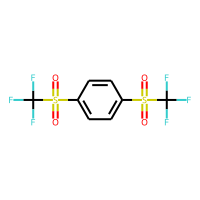
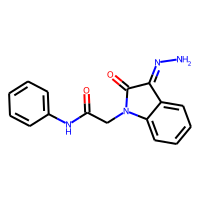
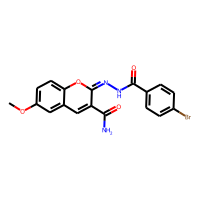
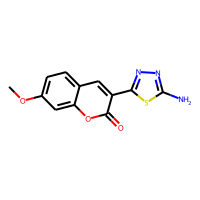
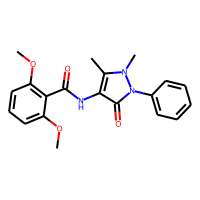
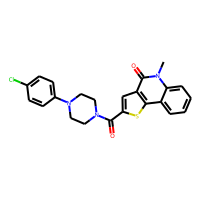
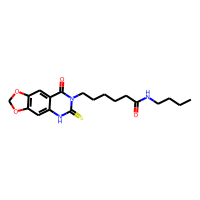
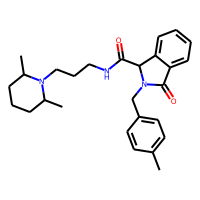
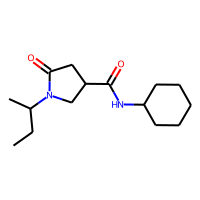
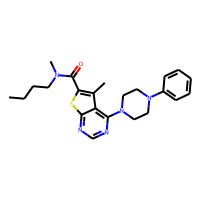

In [9]:
scams = pd.read_csv('SCAMS.csv')
PandasTools.AddMoleculeColumnToFrame(scams, 'Smiles String','Molecule')
scams

In [55]:
# сделать sdf файл
# все столбци из исходного csv сохраняются как тэги, это надо ?
PandasTools.WriteSDF(scams, 'scams_out.sdf', molColName='Molecule', properties=list(scams.columns))

In [10]:
# исключить спорные структуры полученные при ChemSar
scams.drop(labels=[254, 451, 470, 472, 474, 516, 97, 459], axis=0,  inplace=True, errors='raise')

In [ ]:
#  убрать лишнюю нумерацию
del scams['Unnamed: 0']
# перенумеровать ряды
scams_filt = scams.reset_index(drop=True, inplace=False)

In [4]:
# прочитать  тестовый файл

test_set = pd.read_csv('test_DLS.csv') # прочитать тестовую выборку
PandasTools.AddMoleculeColumnToFrame(test_set, 'Smiles String','Molecule', includeFingerprints=False)

In [10]:
# agg? начения сделать int

scams_filt['agg?'] = scams_filt['agg?'].apply(lambda x: int(x))
test_set['agg?'] = test_set['agg?'].apply(lambda x: int(x))

In [13]:
#  схранить как sdf
PandasTools.WriteSDF(test_set, 'test_set.sdf', molColName='Molecule', properties=list(test_set.columns))
PandasTools.WriteSDF(scams_filt, 'scams_filt.sdf', molColName='Molecule', properties=list(scams_filt.columns))

# test_y = test_df['agg?']
# молекулы - 'Smiles String', 'Molecule'